## project: medallions
- goal: medallion value based on net revenue
- analyze the following for yellow cabs:
    - number of rides per day
    - average spent per ride
    - total ride revenue collected per day 
    - average number of rides per medallion


Todo:
- Trips Per Day / Unique Drivers
- Trips Per Day / Unique Vehicles
- Trips Per Day / Vehicles Per Day
- Avg Days Vehicles on Road * Average Daily Rev
- Avg Hours Per Day Per Driver - (Avg Minutes Per Trip/60) = non trip time
- ### Predict Annualized Revenune


## imports

In [3]:
from IPython.display import display, HTML
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
display(HTML("<style>div.output_scroll { height: 10em; }</style>"))
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


## raw data


In [5]:
data_reports_monthly = pd.read_csv('data_reports_monthly.csv')

data_reports_monthly.columns = data_reports_monthly.columns.str.strip()



In [6]:
data_reports_monthly['License Class'].value_counts()

Yellow               159
Green                116
FHV - Livery          99
FHV - Black Car       99
FHV - High Volume     99
FHV - Lux Limo        99
Name: License Class, dtype: int64

## pre-processing

In [7]:
# Filter for only Yellow Licence Class

data_reports_monthly = data_reports_monthly[data_reports_monthly['License Class'] == 'Yellow']

# Make month/year index

data_reports_monthly['Month/Year'] = pd.to_datetime(data_reports_monthly['Month/Year'])
data_reports_monthly.set_index('Month/Year', inplace=True)

# Replace commas

data_reports_monthly = data_reports_monthly.replace({',': ''}, regex=True)

# Convert all columns to numeric
data_reports_monthly = data_reports_monthly.apply(pd.to_numeric, errors='coerce')


## inspection

In [8]:
data_reports_monthly['Avg Trip Value'].describe()

count    159.000000
mean      12.981887
std        2.172784
min        6.180000
25%       11.250000
50%       13.230000
75%       13.975000
max       20.900000
Name: Avg Trip Value, dtype: float64

In [9]:
data_reports_monthly.columns.tolist()

['License Class',
 'Trips Per Day',
 'Farebox Per Day',
 'Unique Drivers',
 'Unique Vehicles',
 'Vehicles Per Day',
 'Avg Days Vehicles on Road',
 'Avg Hours Per Day Per Vehicle',
 'Avg Days Drivers on Road',
 'Avg Hours Per Day Per Driver',
 'Avg Minutes Per Trip',
 'Percent of Trips Paid with Credit Card',
 'Trips Per Day Shared',
 'Avg Trips per Vehicle',
 'Average Daily Rev',
 'Avg Trip Value',
 'Avg Trip Val Based on Fairbox/Total Trips',
 'Annualized Rev']

## plotting

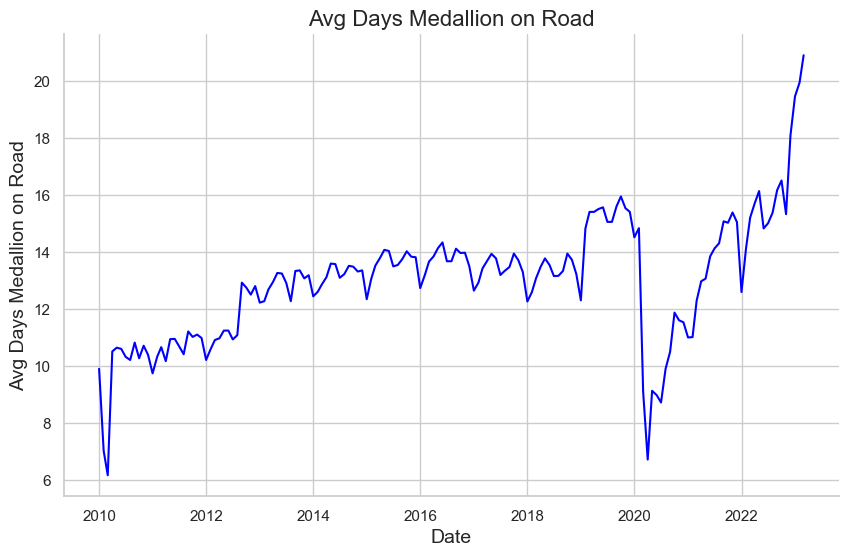

In [17]:
# Set the style of seaborn plot
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10,6))

# Create line plot
sns.lineplot(x=data_reports_monthly.index, y=data_reports_monthly['Avg Trip Value'], color='blue')

# Set title and labels for the plot
ax.set_title('Avg Days Medallion on Road', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Avg Days Medallion on Road', fontsize=14)

# Remove the top and right spines from plot
sns.despine()

# Show plot
plt.show()


In [15]:
data_reports_monthly.head()

,License Class,Trips Per Day,Farebox Per Day,Unique Drivers,Unique Vehicles,Vehicles Per Day,Avg Days Vehicles on Road,Avg Hours Per Day Per Vehicle,Avg Days Drivers on Road,Avg Hours Per Day Per Driver,Avg Minutes Per Trip,Percent of Trips Paid with Credit Card,Trips Per Day Shared,Avg Trips per Vehicle,Average Daily Rev,Avg Trip Value,Avg Trip Val Based on Fairbox/Total Trips,Annualized Rev
Month/Year,,,,,,,,,,,,,,,,,,
2023-03-01,NaN,109231,2658809,11235,8119,6970,26.6,8.5,22.5,7.3,15.5,1,NaN,15.671593,327.48,20.90,24.34,119530.15
2023-02-01,NaN,103632,2440137,10762,7886,6679,23.7,8.4,20.2,7.2,14.7,1,NaN,15.516095,309.43,19.94,23.55,112940.65
2023-01-01,NaN,98569,2335375,10594,7737,6354,25.5,8.2,21.6,7.1,14.4,1,NaN,15.512905,301.85,19.46,23.69,110173.44
2022-12-01,NaN,109290,2358924,10749,7791,6529,26.0,8.7,22.0,7.5,16.9,1,NaN,16.739164,302.78,18.09,21.58,110513.06
2022-11-01,NaN,108146,2088897,10804,7685,6100,23.8,9.1,19.9,7.7,16.5,1,NaN,17.728852,271.81,15.33,19.32,99212.41
